# Forecasting Stock Prices
**Data Analytics and Big Data Capstone Project 2018c-5 - Data Science with Python**

“`The stock market is designed to transfer money from the active to the patient`.” ― **Warren Buffett**


## Problem Statement

Research associated with the stock market focuses on offering the best tools to the investor to predict the behavior of their product portfolio in search of the best returns; but in a smaller number it addresses the dimensionality and expectations of the new investor.

The common perception of the new investor is that it is highly risky to place their savings in these investment models or that they are beyond their economic capacity.

Variations are instantaneous, but the returns from this type of investment do not occur in the short term. It is important to recognize the pattern of behavior in the medium or long term and to have 'nerves of steel' at the first signs of loss of value of their stock.

Understanding these variations and identifying similar patterns in the past are important, for an investor who wants to be properly advised. Understanding variations is part of informed decision making when investing in the stock market.

To solve this problem, the analysis of 'Time Series' is a tool that makes it easier to forecast the trend or even to forecast the future; this will provide the right investment tool in taking their decisions.

That is why we will experiment with predicting stock prices for a technology-based company using Machine Learning and Deep Learning Techniques. With which we will structure a set of prediction models to help the new investor in taking decisions about the acquisition or sale of its stocks.

The main objective is to show how to implement these algorithms, and to provide a final demonstration with one of the models; the one that provides the best final accuracy metrics and least possible error.

To maximize results and if you have little experience in time series, I suggest to start with the following articles:

- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/?utm_source=blog&utm_medium=stockmarketpredictionarticle)
- [A Complete Tutorial on Time Series Modeling](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/?utm_source=blog&utm_medium=stockmarketpredictionarticle)


### Clarify the project goal/scope.

- The `profit or loss calculation is usually determined by the 'Close Price'` of a stock for the day, hence we will **consider the closing price as the target variable**.

- Other data sets offer additional information such as: The attributes 'Dividend', 'Split' and 'Adjusted'. These attributes can then be used for a new research approach using the '**Granger Causality Test**' which is used to find out if one series can predict another series. This research will focus on the values provided by [MacroTrends](https://www.macrotrends.net/stocks/charts/INTC/intel/stock-price-history)

### Set down Evaluation Criteria
** pending **

El historico de datos considerados para esta investigacion preliminar comprenden desde Enero 01 del 2016 hasta la Enero 01 del 2021

### Set down preliminary research hypothesis
** pending **

utilizar registros hitoricos mayores a 10 puede agregar ruido al proceso de prediccion.


## Table of Contents
 1. Setup Work Environment
 2. Exploratory Data Analysis (EDA)


2. Moving Average
3. Linear Regression
4. k-Nearest Neighbors
5. Auto ARIMA
6. Prophet
7. Long Short Term Memory (LSTM)

###  1. Setup Work Environment

In [12]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from matplotlib.pyplot import rcParams

# plot within notebook
%matplotlib inline

In [14]:
## load parameters
# scaler = MinMaxScaler(feature_range=(0, 1))

# set figure size
rcParams['figure.figsize'] = 10, 8

In [41]:
# Load dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

# load data
df = pd.read_csv('.\\data\\eod.data-intc.csv') #,  index_col='Date', parse_dates=['Date'], date_parser=dateparse)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace('_', '') for x in df.columns]

(10090, 6)


### 2. Exploratory Data Analysis (EDA)

In [43]:
print('\n Shape of the data:\n')
print(df.shape)

print('\n Data\'s Info:\n')
print(df.info())

print('\n First data rows:')
df.head(5)


 Shape of the data:

(10090, 6)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10090 entries, 0 to 10089
Data columns (total 6 columns):
date      10090 non-null object
open      10090 non-null float64
high      10090 non-null float64
low       10090 non-null float64
close     10090 non-null float64
volume    10090 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 473.1+ KB
None

 First data rows:


,date,open,high,low,close,volume
0,3/17/1980,0.3255,0.3307,0.3255,0.3255,10924800
1,3/18/1980,0.3255,0.3281,0.3229,0.3229,17068800
2,3/19/1980,0.3307,0.3359,0.3307,0.3307,18508800
3,3/20/1980,0.3307,0.3346,0.3294,0.3294,11174400
4,3/21/1980,0.3229,0.3229,0.3177,0.3177,12172800


The dataset has daily operations at the stock market close, for a total of 10090 observations and 6 attributes.

You should consider that on **Saturdays**, **Sundays** and **Holidays** there are no stock market operations and therefore there are no data for these days.

There are multiple variables in the dataset [Reference](https://www.investopedia.com/):

- Columns '**Open**' and '**Close**' represent the starting and final price at which the stock is traded on a particular day.
- Columns '**High**' and '**Low**' represent the maximum and minimum price of the share for the day.
- Column '**Volume**' reprente number of shares bought or sold in the day.

In [44]:
# setting the index as date
df['date'] = pd.to_datetime(df.date, format='%m/%d/%Y')
df.index = df['date']
df.drop(['date'], axis=1, inplace=True)
df.sort_index(ascending=True, axis=0, inplace=True)
df.head(5)

,open,high,low,close,volume
date,,,,,
1980-03-17,0.3255,0.3307,0.3255,0.3255,10924800
1980-03-18,0.3255,0.3281,0.3229,0.3229,17068800
1980-03-19,0.3307,0.3359,0.3307,0.3307,18508800
1980-03-20,0.3307,0.3346,0.3294,0.3294,11174400
1980-03-21,0.3229,0.3229,0.3177,0.3177,12172800


Text(0, 0.5, 'USD')

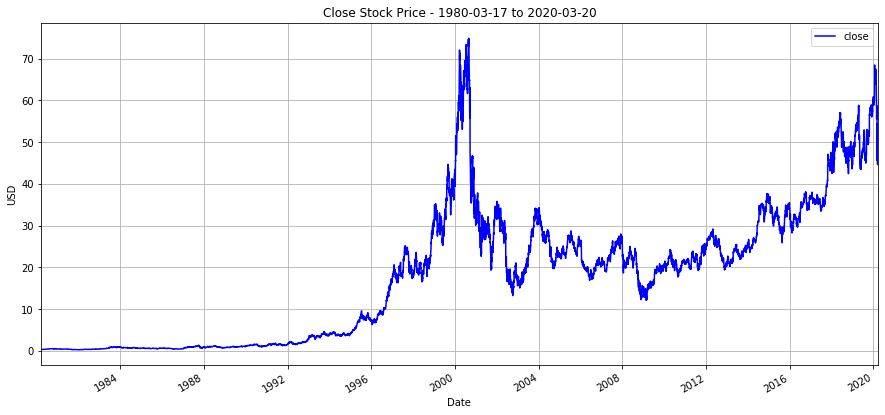

In [47]:
# plot close over time
rcParams['figure.figsize'] = 15, 7
ax = df.plot(y='close', style='b-', grid=True, title='Close Stock Price - 1980-03-17 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [55]:
df.describe()

,open,high,low,close
count,10090.000000,10090.000000,10090.000000,10090.000000
mean,17.744796,17.988726,17.501696,17.743389
std,16.084734,16.313632,15.864770,16.085440
min,0.218800,0.218800,0.216100,0.216100
25%,1.130200,1.149350,1.117200,1.132800
50%,19.260000,19.500000,19.029950,19.250000
75%,27.306750,27.617500,26.909750,27.270000
max,75.630000,75.810000,73.630000,74.880000


The descriptive data view shows a relatively similar 'mean' and 'standard deviation' for the values 'open', ' high', 'low' and 'close'.

For the purposes of this preliminary investigation, the values for 'volume' have a bias that we will deal with right away, meanwhile we will remove this attribute from the data set.

The data set includes observations from 1984 until the present. Values older than 3 years will not be considered in this preliminary investigation. Part of this decision is based on the historical values shown from the origin to the end of 1996 and the values between 1998 and 2004. Therefore, observations with more than 3 years will be removed.

Such a detailed study will require time that is not contemplated within the scope of this investigation.

In [49]:
# remove volume attribute
df.drop('volume', axis=1, inplace=True)

In [71]:
# set start and end date range
start_date = dt.datetime(2018, 1, 30)
end_date = dt.datetime(2021, 1, 30)

# get data range by date
df_adj = df.loc[start_date:end_date, ]

In [72]:
print('\n Shape of the data:\n')
print(df_adj.shape)

print('\n Data\'s Info:\n')
print(df_adj.info())

print('\n First data rows:')
df_adj.head(5)


 Shape of the data:

(1042, 4)

 Data's Info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1042 entries, 2016-02-01 to 2020-03-20
Data columns (total 4 columns):
open     1042 non-null float64
high     1042 non-null float64
low      1042 non-null float64
close    1042 non-null float64
dtypes: float64(4)
memory usage: 40.7 KB
None

 First data rows:


,open,high,low,close
date,,,,
2016-02-01,30.72,31.12,30.64,30.82
2016-02-02,30.45,30.49,29.63,29.80
2016-02-03,29.72,29.72,28.52,29.34
2016-02-04,29.14,29.88,29.11,29.77
2016-02-05,29.58,29.76,28.91,29.04


In [73]:
df_adj.describe()

,open,high,low,close
count,1042.000000,1042.000000,1042.000000,1042.000000
mean,43.974053,44.429741,43.540014,44.000921
std,9.003401,9.149852,8.869125,9.005712
min,27.830000,28.410000,27.680000,28.220000
25%,35.670000,35.942500,35.400000,35.702500
50%,45.515000,46.050000,44.850000,45.520000
75%,50.740000,51.575000,50.180000,50.845000
max,67.630000,69.290000,67.310000,68.470000


The adjustment of the proposed data returns values of 'mean' around 17+/-0.2 and 'standard deviation' of 16+/-0.4. Also the minimum and maximum value changed have been moved for the dependent variable 'Close Price' from: minimum (from 0.21 to 17.66) and maximum (from 74.88 to 68.47).

Text(0, 0.5, 'USD')

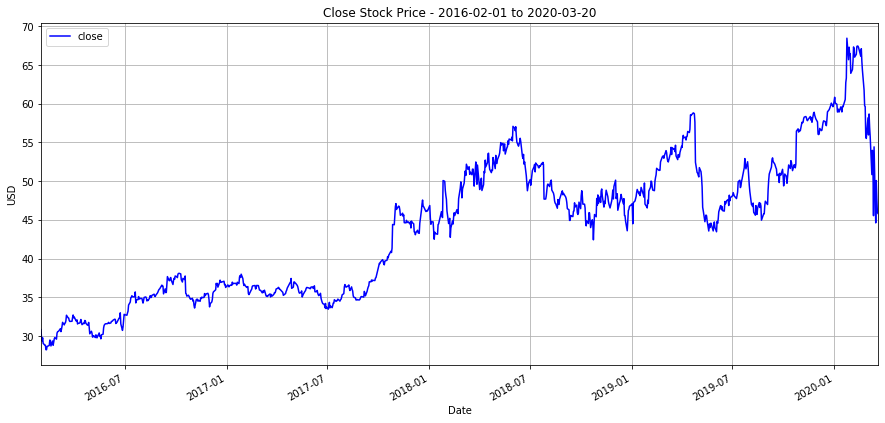

In [75]:
# plot close over time
rcParams['figure.figsize'] = 15, 7
ax = df_adj.plot(y='close', style='b-', grid=True, title='Close Stock Price - 2018-01-30 to 2020-03-20')
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [ ]:
#### 2.1 Clarify the project goal/scope.